In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

#Upload dataset
from google.colab import files
uploaded = files.upload()

#read dataset
df = pd.read_csv('depression_data_scaled.csv')

Saving depression_data_scaled.csv to depression_data_scaled.csv


Original dataset shape: (408611, 16)
Original class distribution:
Target
0    283886
1    124725
Name: count, dtype: int64
Percentage of 1s: 30.52%

Minority class (1s): 124725 samples
Majority class (0s): 283886 samples

Selected 124725 most informative majority samples

Final balanced dataset:
Shape: (249450, 16)
Class distribution:
Target
0    124725
1    124725
Name: count, dtype: int64
Percentage of 1s: 50.00%

All original features preserved: True
Dataset contains all scaled and encoded features


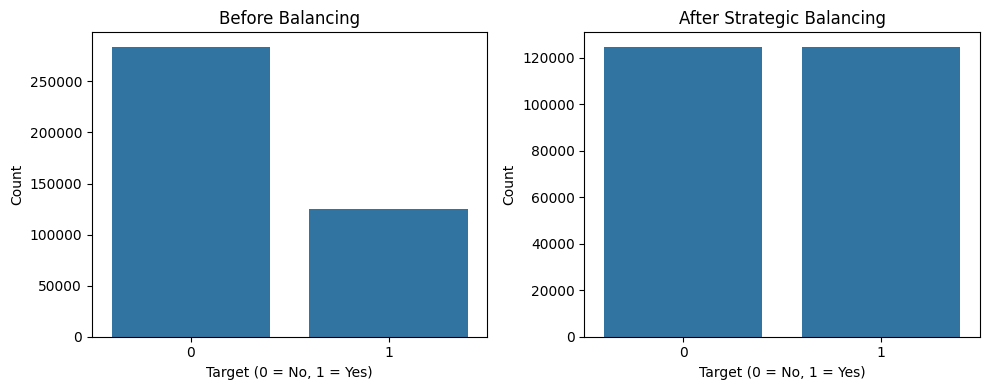


Sample of the balanced dataset:
        Age  Number of Children    Income  Education Level  Sleep Patterns  \
0  1.596498            1.378132 -1.226097              2.0             1.0   
1 -1.096950            0.569403 -0.186166              0.0             0.0   
2 -0.767140           -1.048056 -0.452160              0.0             2.0   
3 -0.107520           -1.048056 -0.574881              2.0             2.0   
4 -1.536697           -0.239327 -0.681067              0.0             1.0   

   Physical Activity Level  Alcohol Consumption  Dietary Habits  \
0                      1.0                  1.0             1.0   
1                      1.0                  1.0             0.0   
2                      1.0                  2.0             1.0   
3                      0.0                  0.0             1.0   
4                      2.0                  0.0             1.0   

   Marital Status  Smoking Status  Employment Status  \
0             0.0             2.0      

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
print("Original dataset shape:", df.shape)
print("Original class distribution:")
print(df['Target'].value_counts())
print(f"Percentage of 1s: {df['Target'].mean():.2%}")

# Separate majority and minority classes
df_minority = df[df['Target'] == 1]  # All Yes (1s)
df_majority = df[df['Target'] == 0]  # All No (0s)

print(f"\nMinority class (1s): {len(df_minority)} samples")
print(f"Majority class (0s): {len(df_majority)} samples")

# Use feature importance to find which majority class samples are most valuable
X = df.drop('Target', axis=1)
y = df['Target']

# Train a simple Random Forest to get feature importance and sample informativeness
rf = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')
rf.fit(X, y)

# Get predicted probabilities for majority class samples
X_majority = df_majority.drop('Target', axis=1)
proba_majority = rf.predict_proba(X_majority)

# Calculate informativeness score - samples where model is less confident are more valuable
informativeness_scores = 1 - np.max(proba_majority, axis=1)

# Add informativeness scores to majority dataframe and sort by most informative
df_majority = df_majority.copy()
df_majority['informativeness'] = informativeness_scores
df_majority_sorted = df_majority.sort_values('informativeness', ascending=False)

# Select top N most informative majority samples (equal to minority count for perfect balance)
n_samples_needed = len(df_minority)
selected_majority = df_majority_sorted.head(n_samples_needed).drop('informativeness', axis=1)

print(f"\nSelected {len(selected_majority)} most informative majority samples")

# Combine minority and selected majority samples
balanced_df = pd.concat([df_minority, selected_majority], ignore_index=True)

# Shuffle the balanced dataset to mix the classes
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print("\nFinal balanced dataset:")
print("Shape:", balanced_df.shape)
print("Class distribution:")
print(balanced_df['Target'].value_counts())
print(f"Percentage of 1s: {balanced_df['Target'].mean():.2%}")

# Verify all features are preserved
print("\nAll original features preserved:", set(df.columns) == set(balanced_df.columns))
print("Dataset contains all scaled and encoded features")

# Visualize the balancing results
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='Target', data=df)
plt.title('Before Balancing')
plt.xlabel('Target (0 = No, 1 = Yes)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='Target', data=balanced_df)
plt.title('After Strategic Balancing')
plt.xlabel('Target (0 = No, 1 = Yes)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Save the balanced dataset
balanced_df.to_csv('strategically_balanced_depression_data.csv', index=False)

# Show sample of the balanced dataset
print("\nSample of the balanced dataset:")
print(balanced_df.head())

files.download('strategically_balanced_depression_data.csv')